<a href="https://colab.research.google.com/github/sumankanukollu/EVA_4/blob/master/suman_MNIS_with_withOutPyTorchModules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Notes URL : https://github.com/fastai/fastai_old/blob/master/dev_nb/001a_nn_basics.ipynb
from pathlib import Path
import requests

DATA_PATH = Path('data')
PATH = DATA_PATH/'mnist'

PATH.mkdir(parents=True, exist_ok=True)

#https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
URL='https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/'
FILENAME='mnist.pkl.gz'

if not (PATH/FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH/FILENAME).open('wb').write(content)

In [2]:
import os
for r,d,f in os.walk(os.path.join(os.getcwd(),'data')):
  print(r)
  print(d)
  print(f)

/content/data
['mnist']
[]
/content/data/mnist
[]
['mnist.pkl.gz']


In [0]:
import pickle, gzip

with gzip.open(PATH/FILENAME, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

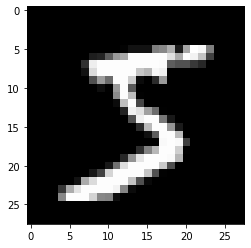

In [4]:
%matplotlib inline

from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [12]:
import torch 

x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9))

In [0]:
import math

weights = torch.randn(784,10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [17]:
print(weights)

tensor([[-0.0158,  0.0197,  0.0136,  ...,  0.0344,  0.0306, -0.0662],
        [ 0.0024,  0.0431, -0.0376,  ...,  0.0603, -0.0683,  0.0454],
        [-0.0147, -0.0132,  0.0067,  ...,  0.0241, -0.0101,  0.0301],
        ...,
        [ 0.0285,  0.0142,  0.0227,  ...,  0.0604,  0.0458,  0.0202],
        [-0.0315, -0.0394,  0.0244,  ...,  0.0494,  0.0091, -0.0540],
        [ 0.0037, -0.0447,  0.0261,  ..., -0.0172, -0.0125,  0.0233]],
       requires_grad=True)


In [0]:
def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):      return log_softmax(xb @ weights + bias)

In [24]:
print(x_train[0].ndim)
print(x_train[0].shape)
print(x_train[0].size)
model(x_train[0:64]).shape

1
torch.Size([784])
<built-in method size of Tensor object at 0x7f0a0b320750>


torch.Size([64, 10])

In [33]:
bs=64                  # batch size

xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
print(preds.shape)
print(len(preds[0]))
preds[0], preds.shape

torch.Size([64, 10])
10


(tensor([-2.1541, -2.2865, -2.0326, -2.9457, -2.2047, -2.5505, -2.1152, -2.6533,
         -2.5004, -1.9849], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [30]:
print(weights.shape)
print(bias.shape)
print(x_train[0:64].shape)

torch.Size([784, 10])
torch.Size([10])
torch.Size([64, 784])


In [0]:
def nll(input, target): return -input[range(target.shape[0]), target].mean()
loss_func = nll

In [42]:
yb=y_train[0:bs]
yb
loss_func(preds,yb)

tensor(2.3545, grad_fn=<NegBackward>)

In [0]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds==yb).float().mean()
    

In [44]:
accuracy(preds,yb)

tensor(0.0938)

In [0]:
from IPython.core.debugger import set_trace

lr = 0.5   # learning rate
epochs = 2 # how many epochs to train for

In [0]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        #set_trace()
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [49]:

loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0649, grad_fn=<NegBackward>), tensor(1.))